In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [23]:
df = pd.read_csv(r'../data/processed/data.csv')

# Separate features and labels
X = df[[column for column in list(df.columns) if column not in ['label', 'session_id', 'new_label', 'entropy', 'acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'durations','hover_frequency','speed_cv']]]
y = df['label']

### PCA plot

Counter({'advanced_bot': 170, 'moderate_bot': 170, 'human': 109})


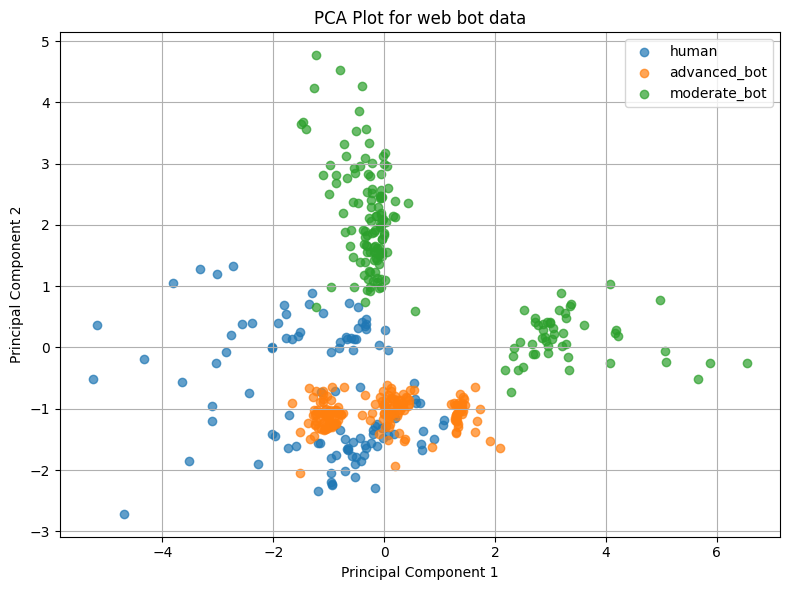

In [24]:
def pca_plot(x,y):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA to reduce to 2 components
    pca = PCA(n_components=2, svd_solver='full')
    principal_components = pca.fit_transform(X_scaled)

    # Create a new DataFrame for plotting
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['label'] = y

    # Plot
    plt.figure(figsize=(8, 6))
    for label in pca_df['label'].unique():
        subset = pca_df[pca_df['label'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], label=f'{label}', alpha=0.7)

    plt.title('PCA Plot for web bot data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print(Counter(y))
pca_plot(X, y)

### Borderline SMOTE

https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/

Counter({'human': 170, 'advanced_bot': 170, 'moderate_bot': 170})


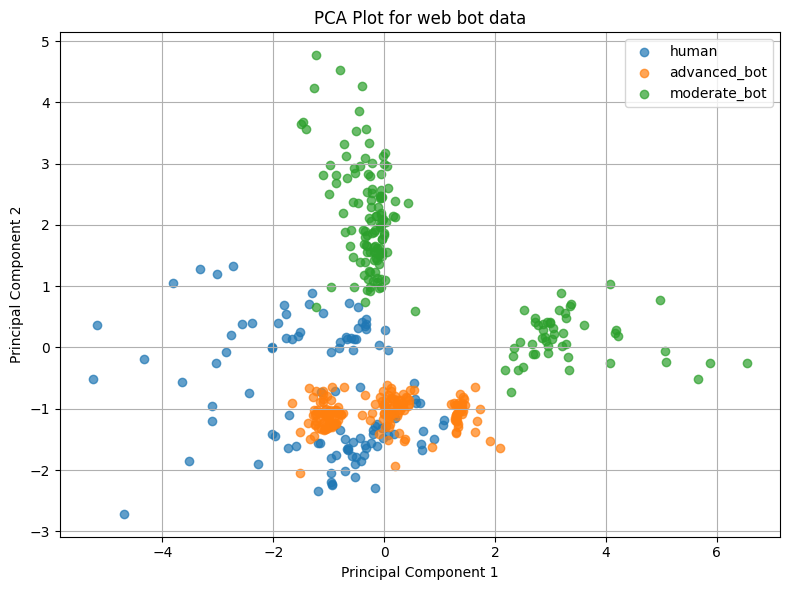

In [25]:


# Separate features and labels
X_bsmote = df[[column for column in list(df.columns) if column not in ['label', 'session_id', 'new_label', 'entropy', 'acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'durations','hover_frequency','speed_cv']]]
y_bsmote = df['label']

# oversample = BorderlineSMOTE()
oversample_bsmote = BorderlineSMOTE(random_state=42)

X_bsmote,y_bsmote = oversample_bsmote.fit_resample(X,y)

print(Counter(y_bsmote))

pca_plot(X_bsmote, y_bsmote)

### SMOTE

Counter({'human': 170, 'advanced_bot': 170, 'moderate_bot': 170})


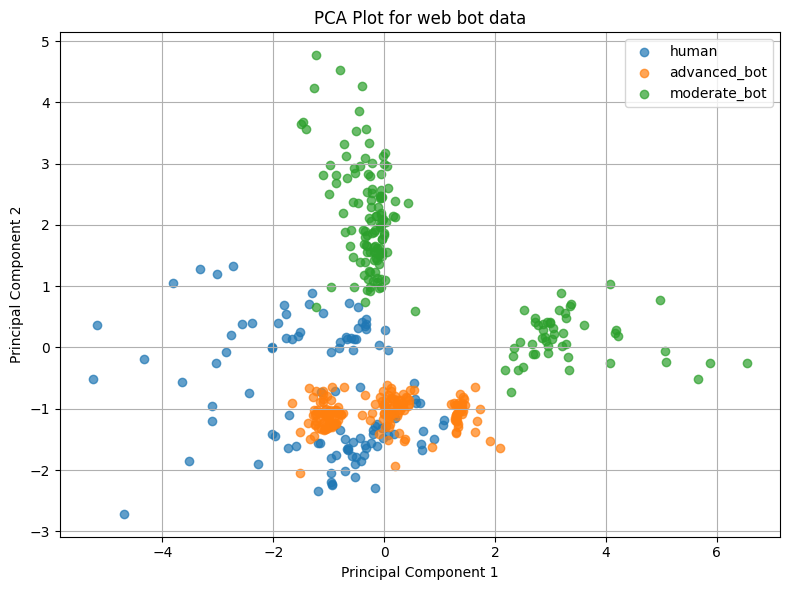

In [26]:

# Separate features and labels
X_smote = df[[column for column in list(df.columns) if column not in ['label', 'session_id', 'new_label', 'entropy', 'acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'durations','hover_frequency','speed_cv']]]
y_smote = df['label']

oversample_smote = SMOTE(random_state=42)

X_smote, y_smote = oversample_smote.fit_resample(X_smote,y_smote)

print(Counter(y_smote))

pca_plot(X_smote,y_smote)

#### ADASYN

Counter({'human': 170, 'advanced_bot': 170, 'moderate_bot': 170})


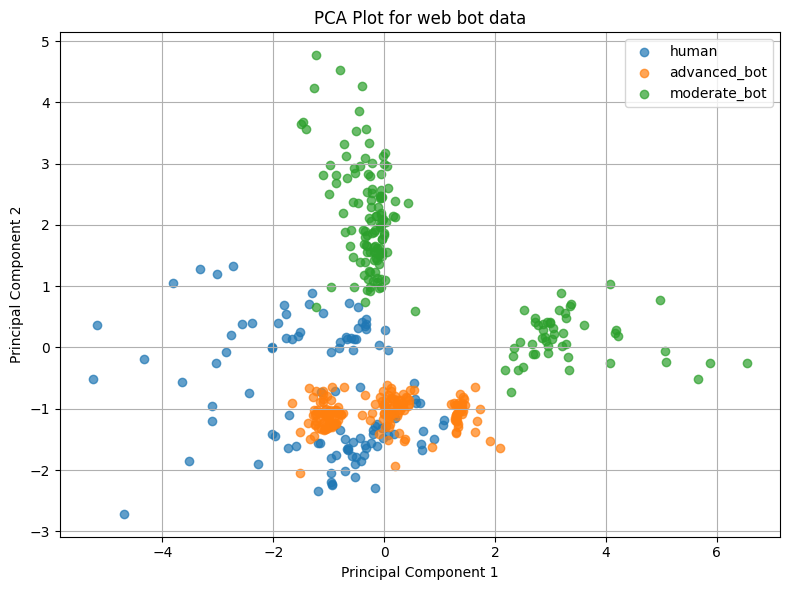

In [27]:

# Separate features and labels
X_ada = df[[column for column in list(df.columns) if column not in ['label', 'session_id', 'new_label', 'entropy', 'acceleration_pos_neg_ratio','acceleration_std','clicks_count', 'durations','hover_frequency','speed_cv']]]
y_ada = df['label']

oversample_ada = ADASYN(random_state=42)

X_ada, y_ada = oversample_ada.fit_resample(X_ada,y_ada)

print(Counter(y_smote))

pca_plot(X_smote,y_smote)